# 2nd model: Adult income

# Reading in income data

In [1]:
import pandas as pd

df = pd.read_csv("adult_income.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Dataset has "?" as values for some records, will replace with NA

In [4]:
df.replace("?", pd.NA, inplace=True)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,<NA>,77053,HS-grad,9,Widowed,<NA>,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,<NA>,186061,Some-college,10,Widowed,<NA>,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Dropping records with null values

In [6]:
df_clean = df.dropna()
df_clean.reset_index(drop=True, inplace=True)

## One hot encoding for categorical columns

In [7]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)

In [8]:
df_encoded.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_>50K
0,82,132870,9,0,4356,18,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,54,140359,4,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,41,264663,10,0,3900,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,34,216864,9,0,3770,45,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4,38,150601,6,0,3770,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


## split target/geature

In [9]:
X = df_encoded.drop('income_>50K', axis=1)
y = df_encoded['income_>50K']

## split training and testiong 80/20

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## standardizing features

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## training LR model

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# prediction

In [13]:
y_pred = model.predict(X_test_scaled)

## Evaluation

In [14]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.91      4531
        True       0.75      0.62      0.68      1502

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



## Confusion Matrix

Confusion Matrix:


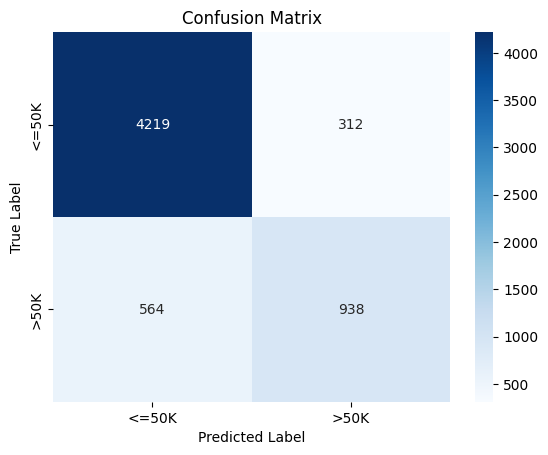

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
%pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Hyperparameter tuning with Bayesian search

In [17]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_spaces = {
    'C': Real(0.01, 10.0, prior='log-uniform'),
    'solver': Categorical(['liblinear', 'lbfgs']),
    'class_weight': Categorical([None, 'balanced']),
    'max_iter': Integer(200, 1000)
}

log_reg = LogisticRegression()

opt = BayesSearchCV(
    estimator=log_reg,
    search_spaces=search_spaces,
    scoring='f1_macro',
    n_iter=32,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

## Model fit search

In [18]:
opt.fit(X_train_scaled, y_train)

best_bayes_model = opt.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

## prediction

In [19]:
y_pred_best = best_bayes_model.predict(X_test_scaled)

## Evaluation report

In [20]:
print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_best))

Tuned Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.93      0.91      4531
        True       0.75      0.62      0.68      1502

    accuracy                           0.85      6033
   macro avg       0.82      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



## Confusion matrix

Confusion Matrix:


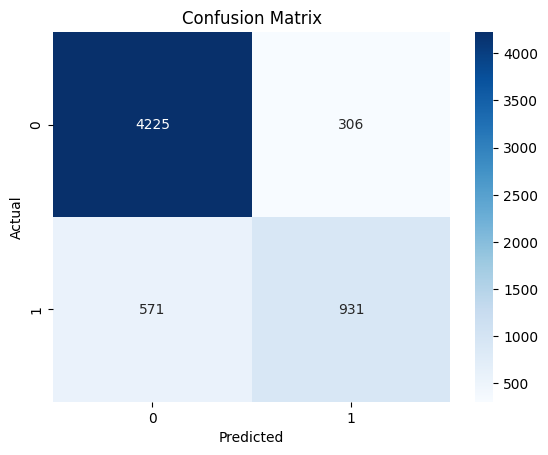

In [21]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()